In [272]:
from nilearn import image
from nilearn import plotting
import numpy as np
import matplotlib as plt
import os
import pathlib
import warnings
warnings.filterwarnings("ignore")

## Importing an image

In [292]:
img = image.load_img('./data1.nii') 

print(img.header)
# Affine transform matrix, in 3D it is a 4by4 matrix, translation and rotation
print('Affine transform matrix = \n',img.affine )

# Shape of img: 256 by 256 by 170
print('\n','Shape of image matrix = ',img.shape)

# getting the value of color at matrix element 100,100,1
print('\n','image color value at location [100,10,1] = ', img.get_data()[100,10,1])

# getting the color data for all the elements of the matrix
allColors = img.get_data()[:,:,:]

# finding the maximum and minimum value of the color data of the image
print('\n','max =', np.max(allColors), ', min =', np.min(allColors))

<class 'nibabel.nifti1.Nifti1Header'> object, endian='>'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'002_S_0413'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 170   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [ 1.          0.99963599  1.00463903  1.20317495  1.          1.          1.
  1.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 851.9144287109375
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'MPR; ; N3; Scaled'
aux_file        : b'none'
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.7071067690849304
quatern_c       : -9.696521363622423e-1

## Loading an image and saving different type of its plottings

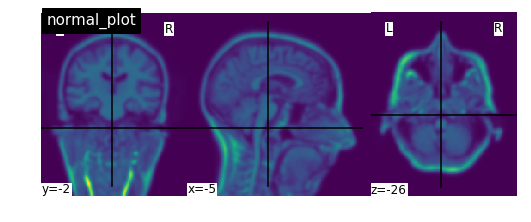

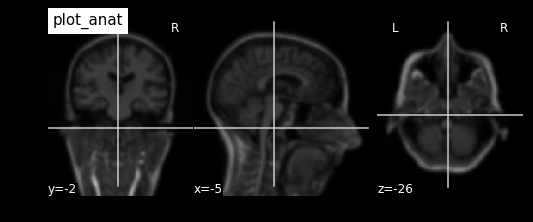

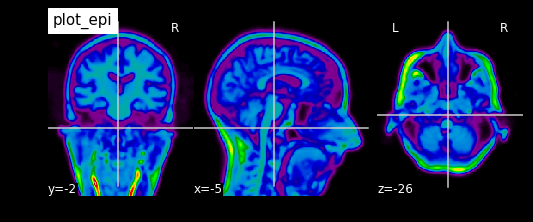

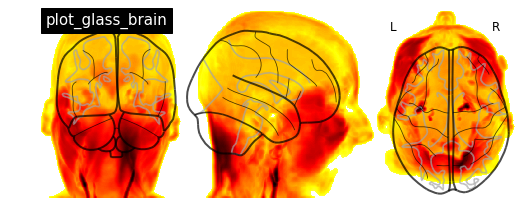

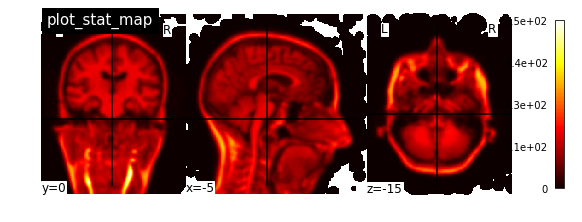

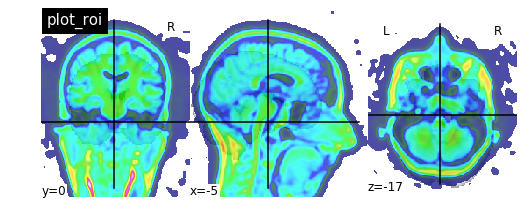

In [274]:
# loading an image and plotting it using different type of plotting function

pathlib.Path('./images/saved_images/different_Plot_Types').mkdir(parents=True, exist_ok=True)  # cheks to see if a directory names "saved_images" does not exits, makes it
new_path = os.path.join(os.getcwd(), "images\saved_images\different_Plot_Types"+'./')

plotting.plot_img(img, title = "normal_plot").savefig(new_path + 'normal_plot.png')
plotting.plot_anat(img, title = "plot_anat").savefig(new_path +  'plot_anat.png') 
plotting.plot_epi(img, title = "plot_epi").savefig(new_path + 'plot_epi.png')
plotting.plot_glass_brain(img, title = "plot_glass_brain").savefig(new_path + 'plot_glass_brain.png')
plotting.plot_stat_map(img, title = "plot_stat_map").savefig(new_path + 'plot_stat_map.png')
plotting.plot_roi(img, title = "plot_roi").savefig(new_path + 'plot_roi.png')

plotting.show()

## Smoothing an image with varying amount of smoothing and saving them


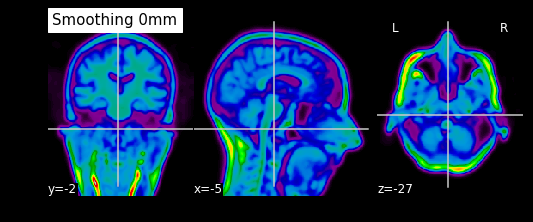

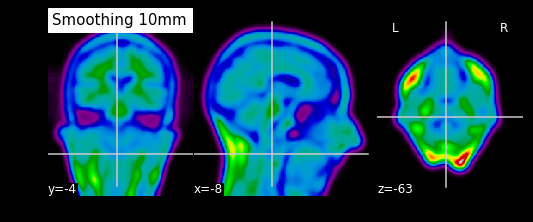

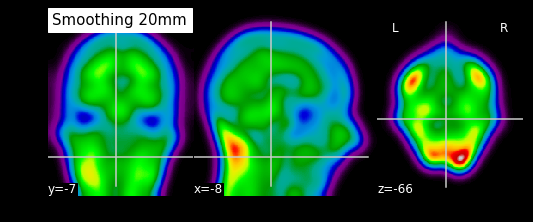

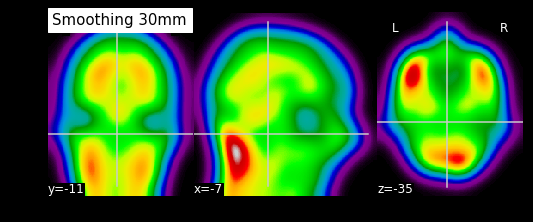

In [275]:
# First we compute the mean image, from the 4D series of image, but here we have only 3D, so taking mean does not give anything further
mean_func = image.mean_img(smooth_anat_img)

pathlib.Path('./images/saved_images/smoothed_images').mkdir(parents=True, exist_ok=True)  # cheks to see if a directory names "smoothed_images" does not exits, makes it
new_path = os.path.join(os.getcwd(), "images\saved_images\smoothed_images" + './')

# Then we smooth, with a varying amount of smoothing, from none to 30mm by increments of 10mm
# If fwhm is None or zero, no filtering is performed
for smoothing in range(0, 40, 10):
    smoothed_img = image.smooth_img(mean_func, smoothing)
    plotting.plot_epi(smoothed_img, title="Smoothing %imm" % smoothing).savefig(new_path + 'smoothed_img_level_' + str(smoothing) + '.png')
    
plotting.show()

## Visualizing in - ‘sagittal’, ‘coronal’ and ‘axial’ for a certain cut-coordinates

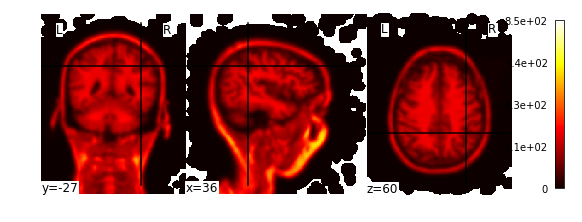

In [276]:
plotting.plot_stat_map(img, display_mode='ortho', cut_coords=[36, -27, 60])
plotting.show()

## Visualizing in - single view ‘sagittal’ with only two slices

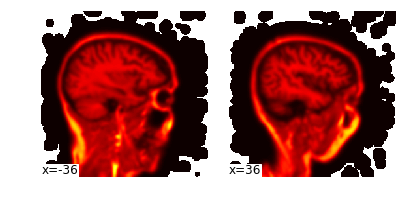

In [277]:
plotting.plot_stat_map(img, display_mode='x', cut_coords=[-36, 36], colorbar=False)
plotting.show()

## Visualize in - two views ‘sagittal’ and ‘axial’ with given coordinates

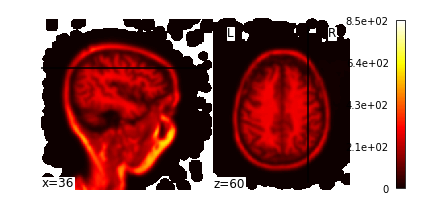

In [278]:
plotting.plot_stat_map(img, display_mode='xz', cut_coords=[36, 60])
plotting.show()

## Adding edges

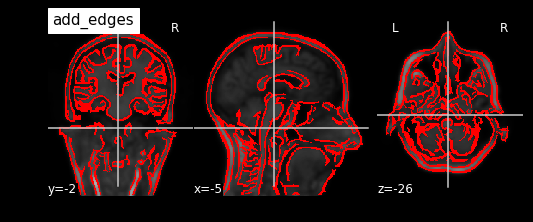

In [279]:
plotting.plot_anat(image.mean_img(img), title="add_edges").add_edges(img)
plotting.show()

## Adding contours

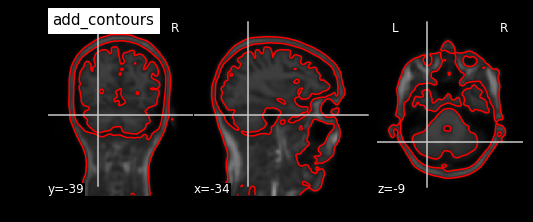

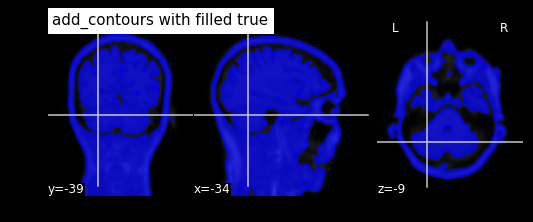

In [280]:
plotting.plot_anat(image.mean_img(img), title="add_contours", cut_coords=[-34, -39, -9]).add_contours(img, levels=[150], colors='r')
plotting.plot_anat(image.mean_img(img), title="add_contours with filled true", cut_coords=[-34, -39, -9]).add_contours(img, filled=True, alpha=0.7, levels=[150], colors='b')
plotting.show()

## Plotting seeds using add_markers

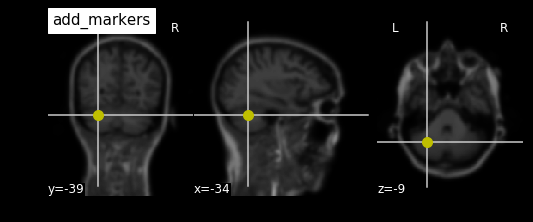

In [305]:
coords = [(-34, -39, -9)]
plotting.plot_anat(image.mean_img(img), title="add_markers", cut_coords=[-34, -39, -9]).add_markers(coords, marker_color='y', marker_size=100)
plotting.show()

In [308]:
help(plotting.plot_surf_roi)

Help on function plot_surf_roi in module nilearn.plotting.surf_plotting:

plot_surf_roi(surf_mesh, roi_map, bg_map=None, hemi='left', view='lateral', alpha='auto', vmin=None, vmax=None, cmap='coolwarm', bg_on_data=False, darkness=1, title=None, output_file=None, axes=None, figure=None, **kwargs)
    Plotting of surfaces with optional background and stats map
    
    .. versionadded:: 0.3
    
    Parameters
    ----------
    surf_mesh : str or list of two numpy.ndarray
        Surface mesh geometry, can be a file (valid formats are
        .gii or Freesurfer specific files such as .orig, .pial,
        .sphere, .white, .inflated) or
        a list of two Numpy arrays, the first containing the x-y-z
        coordinates of the mesh vertices, the second containing the indices
        (into coords) of the mesh faces
    
    roi_map : str or numpy.ndarray or list of numpy.ndarray
        ROI map to be displayed on the surface mesh, can be a file
        (valid formats are .gii, .mgz, .ni

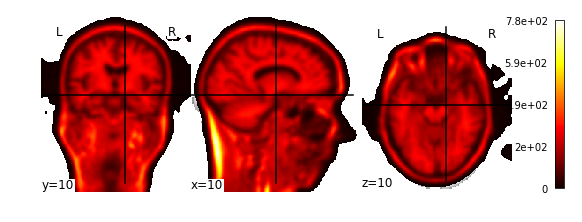

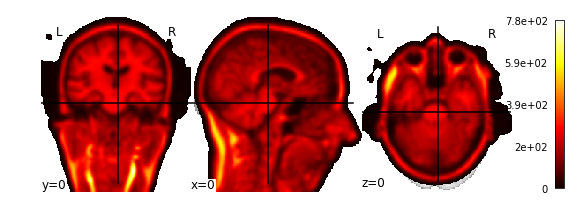

In [282]:
plotting.plot_stat_map(smooth_anat_img, display_mode='ortho',
                       cut_coords=[10, 10, 10.7],threshold=4)
plotting.show()

plotting.plot_stat_map(smooth_anat_img, display_mode='ortho',
                       cut_coords=[0, 0, 0],threshold=4)
plotting.show()